<a href="https://colab.research.google.com/github/RodjonSobiani/ml_learning/blob/main/Laboratory_work_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG

In [34]:
data = pd.read_csv('/content/drive/MyDrive/CSV/data.csv').drop(columns=['name', 'id', 'key']).set_index(['artists'])
data.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
artists,,,,,,,,,,,,,,,
['Carl Woitschach'],0.995,0.708,158648,0.1950,0,0.563,0.1510,-12.428,1,0,1928,0.0506,118.469,0.7790,1928
"['Robert Schumann', 'Vladimir Horowitz']",0.994,0.379,282133,0.0135,0,0.901,0.0763,-28.454,1,0,1928,0.0462,83.972,0.0767,1928
['Seweryn Goszczyński'],0.604,0.749,104300,0.2200,0,0.000,0.1190,-19.924,0,0,1928,0.9290,107.177,0.8800,1928
['Francisco Canaro'],0.995,0.781,180760,0.1300,0,0.887,0.1110,-14.734,0,0,1928-09-25,0.0926,108.003,0.7200,1928
"['Frédéric Chopin', 'Vladimir Horowitz']",0.990,0.210,687733,0.2040,0,0.908,0.0980,-16.829,1,1,1928,0.0424,62.149,0.0693,1928


In [35]:
data.release_date = pd.to_datetime(data.release_date, yearfirst=True)
data.release_date = data.release_date.dt.year

In [36]:
X = data.drop(columns=['popularity'])
y = data.popularity

In [37]:
clf = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=5)

In [38]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

In [39]:
clf.feature_importances_

array([0.01061993, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00247169,
       0.        , 0.        , 0.        , 0.98690838])

In [40]:
pd.DataFrame(data = clf.feature_importances_, index=X.columns, columns=['feature_importances'])

,feature_importances
acousticness,0.010620
danceability,0.000000
duration_ms,0.000000
energy,0.000000
explicit,0.000000
instrumentalness,0.000000
liveness,0.000000
loudness,0.000000
mode,0.000000
release_date,0.002472


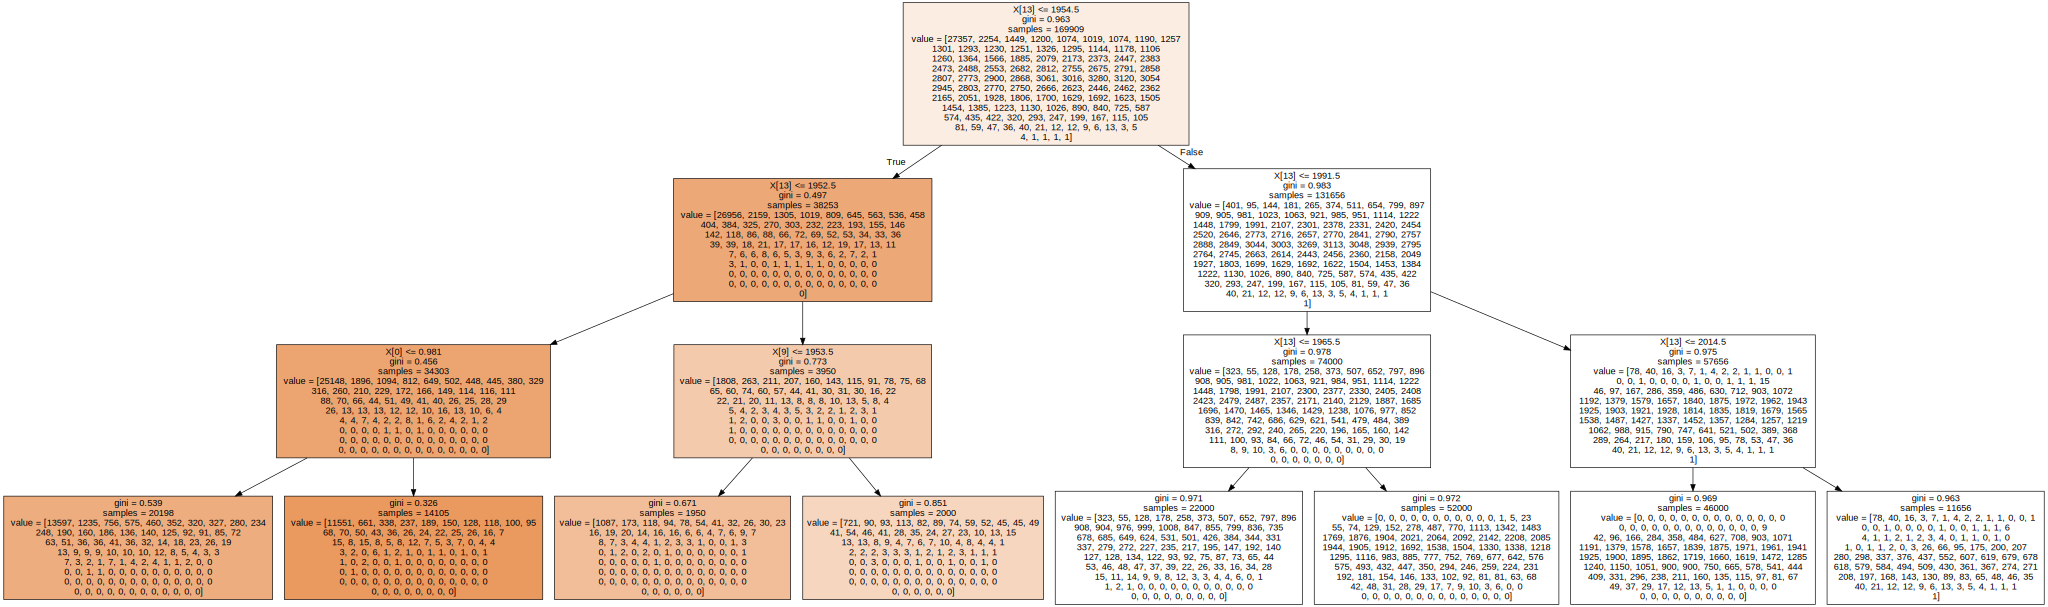

In [41]:
dot_data = export_graphviz(clf, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
display(SVG(graph.pipe(format='svg')))